In [31]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
from PIL import Image

In [33]:
logo = Image.open("h2o-logo.jpg")

In [34]:
data = array(logo)

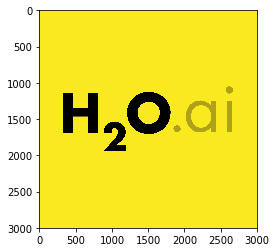

In [35]:
imshow(data)

In [36]:
data.shape

(3000, 3000, 3)

In [37]:
N = 2000000
seed(777)
space = concatenate((randint(0, data.shape[0], N)[:, newaxis], randint(0, data.shape[1], N)[:, newaxis]), axis=1)

In [38]:
uspace = zeros_like(data)
uspace[space[:, 0], space[:, 1]] = 1

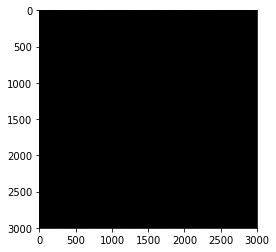

In [39]:
imshow(uspace)

In [40]:
dots = data * uspace

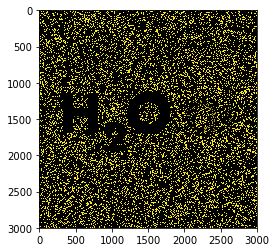

In [41]:
imshow(dots)

In [42]:
dataset = vstack(nonzero(dots)).T

In [43]:
dataset

array([[   0,    2,    0],
       [   0,    2,    1],
       [   0,    2,    2],
       ..., 
       [2999, 2994,    0],
       [2999, 2994,    1],
       [2999, 2994,    2]])

In [44]:
dataset = dataset.astype(float32)

In [45]:
dataset.shape

(5123639, 3)

In [46]:
#import libKMCUDA

In [58]:
#%time cents, asses = libKMCUDA.kmeans_cuda(dataset, 10, seed=777, device=0, yinyang_t=0)

CPU times: user 16.8 s, sys: 4.08 s, total: 20.8 s
Wall time: 20.8 s


In [18]:
import h2oaiglm as h2oaiglm


Loaded H2OAIGLM CPU library

Loaded H2OAIGLM GPU library.


In [60]:
k=10
rows=np.shape(dataset)[0]
np.random.seed(1234)
labels = np.random.randint(rows, size=rows) % k
n_gpus=1
model = h2oaiglm.KMeansGPU(n_gpus=n_gpus, k=k, threshold=1e-7, max_iterations=500)
cents,timefit0,timefit1=model.fit(dataset, labels)
asses = model.predict(dataset)

In [61]:
12 * dots.shape[0] / dots.shape[1]

12.0

In [ ]:
rcParams["figure.figsize"] = (10, 10)
scatter(dataset[::15, 1], dots.shape[0] - dataset[::15, 0], c=asses[::15], edgecolors="none")
scatter(cents[::15, 1], dots.shape[0] - cents[::15, 0], c="white", s=40, edgecolors="none")
xlim((0, dots.shape[1]))
ylim((0, dots.shape[0]))
axis("off")
savefig("sourced.png", transparent=True, bbox_inches=0, pad_inches=0)